<a href="https://colab.research.google.com/github/cyruskimani/Hypothyroidsm-Dataset-Prediction-Models/blob/main/Week_8_Moringa_Core_IP_Cyrus_Kimani_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction Models for Hypothyroidism: Nairobi Hospital Case.

# Defining The Question

## a) Specifying the Question.

Overview 

Hypothyroidism is a condition where the thyroid gland doesn't produce enough throxine hormones. It is one of the most difficult diseases to diagnose as it may not cause noticeable symptoms in its early stages.

Applying decision trees and SVM algorithms can help assist healthcare workers in identifying signs and symptoms based on patterns shown in past cases of patients' data.

This notebook contains decision tree models to predict whether a patient is suffering from Hypothyroidism based on the features of the dataset.

Research Question

Build a model that determines whether or not the patient's symptoms indicate whether a patient has hypothyroidsm.


## b) Defining the Metrics for Success.

The Accuracy score,f1 score, Precision and Confusion Matrix will be used to evaluate the prediction of the of models.


## c) Understanding the context.

The thyroid is a gland that produces thyroid hormone which regulates vital body functions. There are several conditions which are brough about by failure of the thyroid to function normally.

This exercise focusses on Hypothyroidism and seeks to predict the likelyhood of a patient to have hypothyroidism based on tests conducted and the features in the provided dataset.


## d) Recording the Experimental Design.

The experimental design for this project will be composed of Exploratory Data Analysis and Prediction Models as shown below.

Exploratory Data Analysis.

* Univariate Analysis.
* Bivariate Analysis.

Prediction

* Random Forest.
* AdaBoost.
* Gradient Boost.
* Support Vector Machine.



# Loading the Datasets.

In [88]:
# Importing Libraries.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from pandas_profiling import ProfileReport
from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm
import warnings
warnings.filterwarnings(action = 'ignore')

In [89]:
# Loading and previewing the Housing Dataset.

data = pd.read_csv('http://bit.ly/hypothyroid_data')
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


# Data Cleaning.

## Information about the dataset.

In [90]:
# Checking Columns and Datatypes in the Healthcare Dataset.
print('Information of the Healthcare Dataset')
data.info()

Information of the Healthcare Dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                   

*The dataset contains 3163 rows, 26 columns and the respective datatypes for each column as shown above.*

In [91]:
# Obtaining a description of the dataset.

data.describe(include='all')

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,2,2,2,2,240,2,70,2,269,2,159,2,281,2,53
top,negative,?,F,f,f,f,f,f,f,f,f,f,f,f,y,0,y,?,y,?,y,?,y,?,n,?
freq,3012,446,2182,2702,3108,3121,3059,2922,2920,3100,3064,3123,3161,3064,2695,894,2468,695,2914,249,2915,248,2916,247,2903,2903


In [92]:
# Checking the age column as it is an important feature in a healthcare dataset

print('Unique records in age column',data['age'].unique())

Unique records in age column ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


In [93]:
# Getting Unique values in categorical columns

print('Unique records in sex column',data['sex'].unique())
print('Unique records in on_thyroxine column',data['on_thyroxine'].unique())
print('Unique records in query_on_thyroxine column',data['query_on_thyroxine'].unique())
print('Unique records in on_antithyroid_medication column',data['on_antithyroid_medication'].unique())
print('Unique records in thyroid_surgery column',data['thyroid_surgery'].unique())
print('Unique records in query_hypothyroid column',data['query_hypothyroid'].unique())
print('Unique records in query_hyperthyroid column',data['query_hyperthyroid'].unique())
print('Unique records in pregnant column',data['pregnant'].unique())
print('Unique records in sick column',data['sick'].unique())
print('Unique records in tumor column',data['tumor'].unique())
print('Unique records in lithium column',data['lithium'].unique())
print('Unique records in goitre column',data['goitre'].unique())
print('Unique records in TSH_measured column',data['TSH_measured'].unique())
print('Unique records in T3_measured column',data['T3_measured'].unique())
print('Unique records in TT4_measured column',data['TT4_measured'].unique())
print('Unique records in T4U_measured column',data['T4U_measured'].unique())
print('Unique records in FTI_measured column',data['FTI_measured'].unique())
print('Unique records in TBG_measured column',data['TBG_measured'].unique())

Unique records in sex column ['M' 'F' '?']
Unique records in on_thyroxine column ['f' 't']
Unique records in query_on_thyroxine column ['f' 't']
Unique records in on_antithyroid_medication column ['f' 't']
Unique records in thyroid_surgery column ['f' 't']
Unique records in query_hypothyroid column ['f' 't']
Unique records in query_hyperthyroid column ['f' 't']
Unique records in pregnant column ['f' 't']
Unique records in sick column ['f' 't']
Unique records in tumor column ['f' 't']
Unique records in lithium column ['f' 't']
Unique records in goitre column ['f' 't']
Unique records in TSH_measured column ['y' 'n']
Unique records in T3_measured column ['y' 'n']
Unique records in TT4_measured column ['y' 'n']
Unique records in T4U_measured column ['y' 'n']
Unique records in FTI_measured column ['y' 'n']
Unique records in TBG_measured column ['n' 'y']


* *The sex column was found to have three unique classes.*

* *Other categorical columns were found to have two unique classes.*

## Checking for Null and Duplicate Values.

In [94]:
# Checking for null values.

data.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

*No null values were found*

In [95]:
# Checking for duplicates.

print('Number of duplicated records = ',data.duplicated().sum())

Number of duplicated records =  77


In [96]:
# Previewing the duplicated data.

print('The number of duplicated records is=',len(data[data.duplicated()]))
data[data.duplicated()].head()

The number of duplicated records is= 77


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
53,hypothyroid,69,F,f,f,f,f,f,f,f,f,f,f,f,y,21,y,0.80,y,53,y,0.86,y,61,n,?
66,hypothyroid,62,M,f,f,f,f,f,f,f,f,f,f,f,y,100,y,0.40,y,10,y,1,y,10,n,?
124,hypothyroid,77,F,f,f,f,f,f,f,f,f,f,f,f,y,23,y,0.50,y,33,y,0.67,y,49,n,?
128,hypothyroid,79,F,f,f,f,f,f,f,f,f,f,f,f,y,29,y,1.60,y,47,y,0.97,y,48,n,?
131,hypothyroid,50,F,t,f,f,f,f,f,f,f,f,f,f,y,34,n,?,y,55,y,0.93,y,60,n,?


In [97]:
# Dropping one copy of duplicates

data.drop_duplicates(keep='first', inplace = True)
print('Duplicated records in the dataframe:',data.duplicated().any())

Duplicated records in the dataframe: False


## Imputing of Null Values.

In [98]:
# Filling ? values as null values
data.replace('?', np.nan, inplace=True)

In [99]:
# Anomalies found in the unique classes of the sex column
print('Unique values in Sex column before imputing:', data['sex'].unique())
# Check the count of values in the sex column.
print(data['sex'].value_counts())
# Filling missing values in the sex column with the mode.
data.sex.fillna(data.sex.mode()[0], inplace = True)
print('Unique values in Sex column after imputing:', data['sex'].unique())


Unique values in Sex column before imputing: ['M' 'F' nan]
F    2119
M     894
Name: sex, dtype: int64
Unique values in Sex column after imputing: ['M' 'F']


In [100]:
# Anomalies found in the unique classes of the age column
print('Unique values in Age column before imputing:', data['age'].unique())
# Filling missing values in the age column with the mode.
data.age.fillna(data.age.mode()[0], inplace = True)
print('Unique values in Age column after imputing:', data['age'].unique())

Unique values in Age column before imputing: ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
Unique values in Age column after imputing: ['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8'

## Dropping Columns.

In [101]:
# Checking and sorting missing values in each column.
(data.isna().mean().round(3) * 100).sort_values(ascending = False)

TBG                          91.9
T3                           22.0
TSH                          14.7
TT4                           7.8
FTI                           7.7
T4U                           7.7
pregnant                      0.0
age                           0.0
sex                           0.0
on_thyroxine                  0.0
query_on_thyroxine            0.0
on_antithyroid_medication     0.0
thyroid_surgery               0.0
query_hypothyroid             0.0
query_hyperthyroid            0.0
lithium                       0.0
sick                          0.0
tumor                         0.0
TBG_measured                  0.0
goitre                        0.0
TSH_measured                  0.0
T3_measured                   0.0
TT4_measured                  0.0
T4U_measured                  0.0
FTI_measured                  0.0
status                        0.0
dtype: float64

* *The TBG column had 91.9% if missing values.*

In [102]:
# Dropping irrelevant columns.

df = data.drop(columns=['TBG', 'TBG_measured'])
df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17


## Modifying Column Datatypes.

In [103]:
# Defining columns as numeric, Categorical or Boolean.

num=['age','TSH','T3','TT4','T4U','FTI']
categorical=['status','sex','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']
boolean=['on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid','query_hyperthyroid','pregnant','sick','tumor','lithium','goitre']

for column in df.columns:
  if column in num:
    df[column] = df[column].astype('float')
  elif column in categorical:
    df[column] = df[column].astype('category')
  elif column in boolean:
    df[column] = df[column].astype('bool')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   status                     3086 non-null   category
 1   age                        3086 non-null   float64 
 2   sex                        3086 non-null   category
 3   on_thyroxine               3086 non-null   bool    
 4   query_on_thyroxine         3086 non-null   bool    
 5   on_antithyroid_medication  3086 non-null   bool    
 6   thyroid_surgery            3086 non-null   bool    
 7   query_hypothyroid          3086 non-null   bool    
 8   query_hyperthyroid         3086 non-null   bool    
 9   pregnant                   3086 non-null   bool    
 10  sick                       3086 non-null   bool    
 11  tumor                      3086 non-null   bool    
 12  lithium                    3086 non-null   bool    
 13  goitre                     3086 n

In [104]:
# Imputing null values in numerical columns with the mean.

for column in num:
  df[column].fillna(df[column].mean(), inplace = True)
print('Null values in the dataframe:',df.isna().any())

Null values in the dataframe: status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
dtype: bool


## Checking for Outliers.

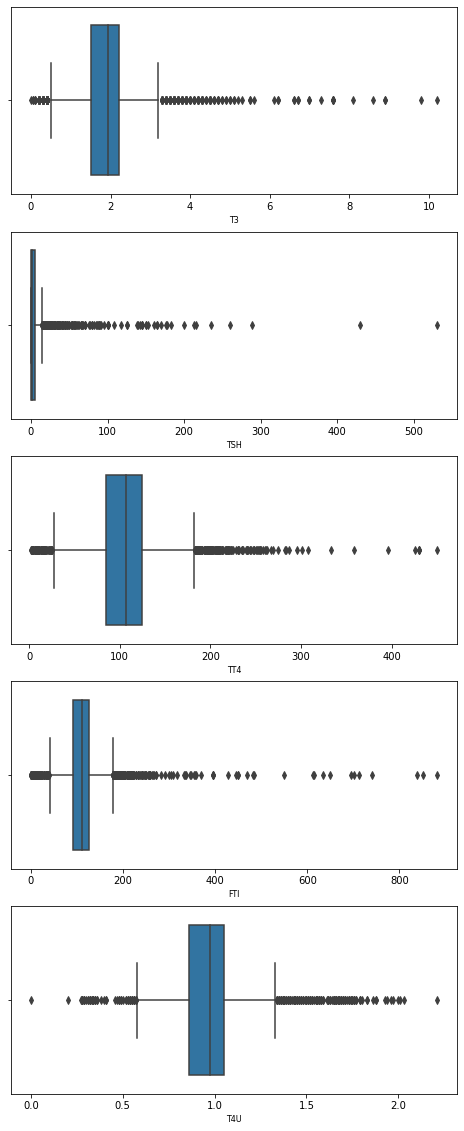

In [105]:
# Checking for outliers.

columns = ['T3','TSH','TT4','FTI','T4U']

fig, ax = plt.subplots(len(columns), figsize= (8,20))

for i, col_val in enumerate(columns):
  sns.boxplot(x = df[col_val], ax= ax[i])
  #ax[i].set_title('Box plot - {}'.format(col_val), fontsize= 10)
  ax[i].set_xlabel(col_val, fontsize= 8)
plt.show()

* Outliers were found in the dataset. However, these outliers will be retained as this is a healthcare dataset and we wish to retain a high level of accuracy.

* The modelling methods that will be applied do not require conventional elimination of outliers.

# Exploratory Data Analysis.

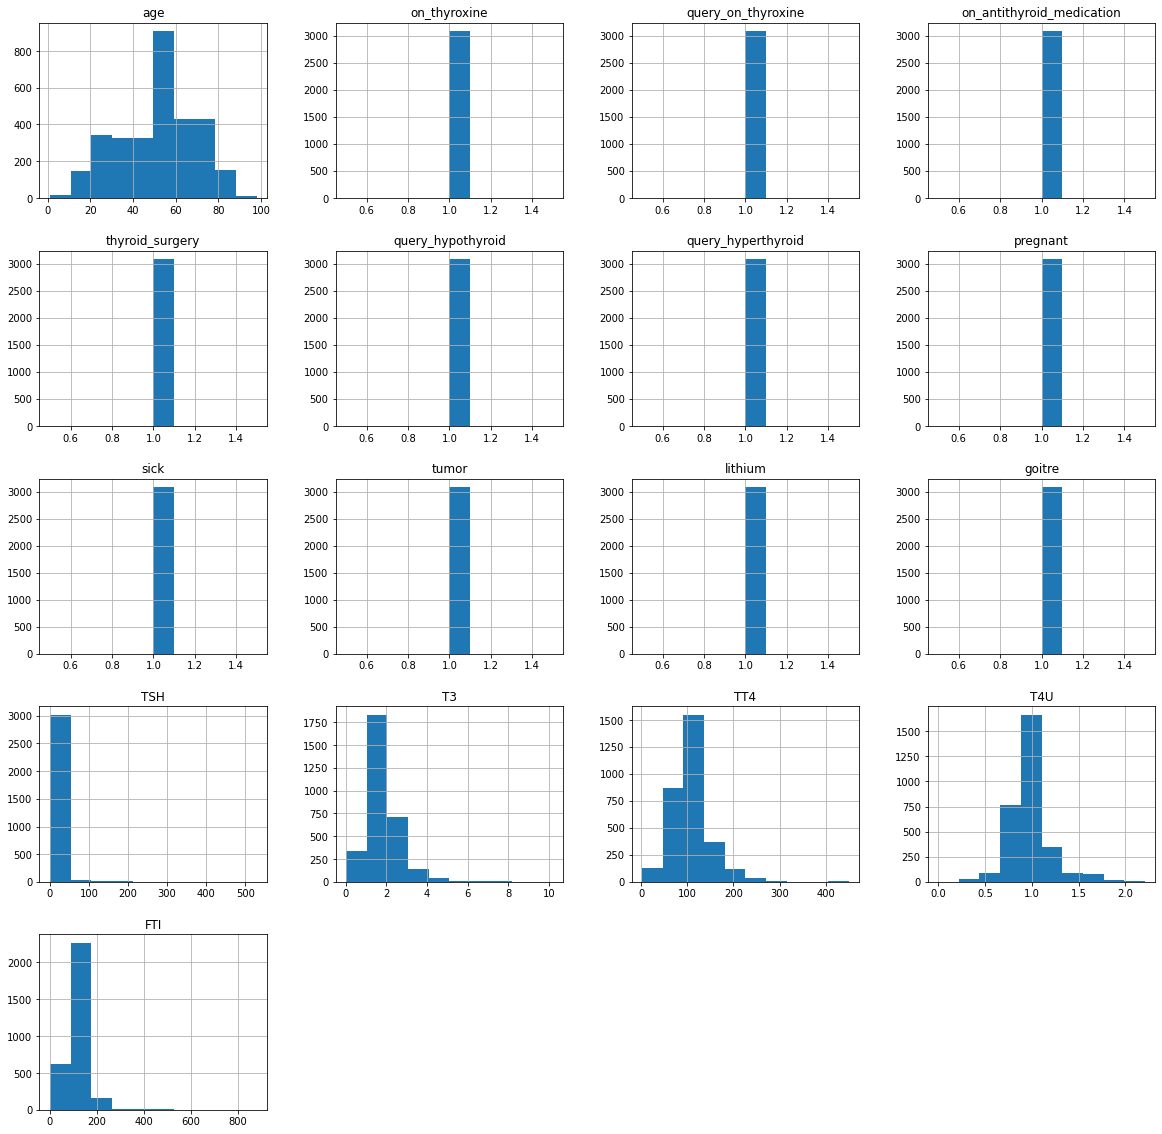

In [106]:
# Checking the distribution of the data

df.hist(figsize = (20,20));

## Univariate Analysis.

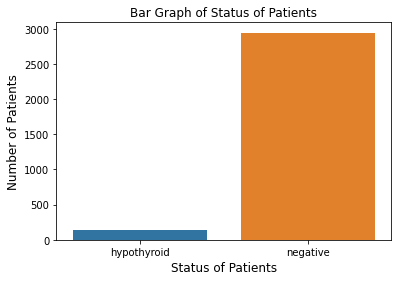

In [107]:
# Visualizing the Status of patients

sns.countplot('status', data=df)
plt.xlabel('Status of Patients', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Bar Graph of Status of Patients', fontsize=12)
plt.show()

* *More patients tested negative than those who tested positive for hypothyroidsm.*

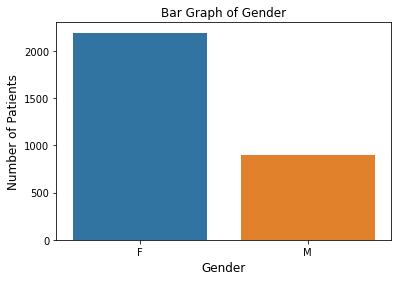

In [108]:
# Visualizing the Gender of Patients

sns.countplot('sex', data=df)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Patients', fontsize=12)
plt.title('Bar Graph of Gender', fontsize=12)
plt.show()

* *There number of female patients was higher than the number of male patients.*

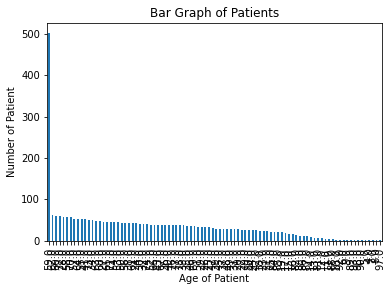

In [109]:
# Visualizing the age of patients.

df['age'].value_counts().plot(kind='bar',rot=90)
plt.xlabel('Age of Patient')
plt.ylabel('Number of Patient')
plt.title('Bar Graph of Patients')
plt.show()

## Bivariate Analysis.

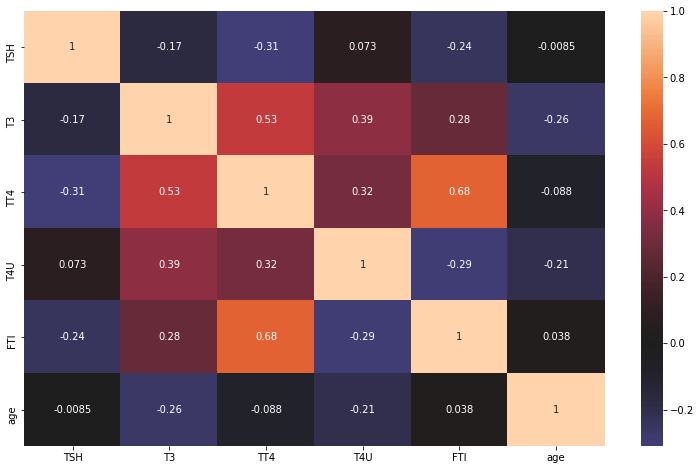

In [110]:
# Heatmap showing how all variables correlate

corr = df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']].corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, annot = True, center = 0)
plt.show()

* *There is a strong correlation between FTI and TT4.*
* *There is a fair correlation between TT4 and T3.*

<Figure size 288x288 with 0 Axes>

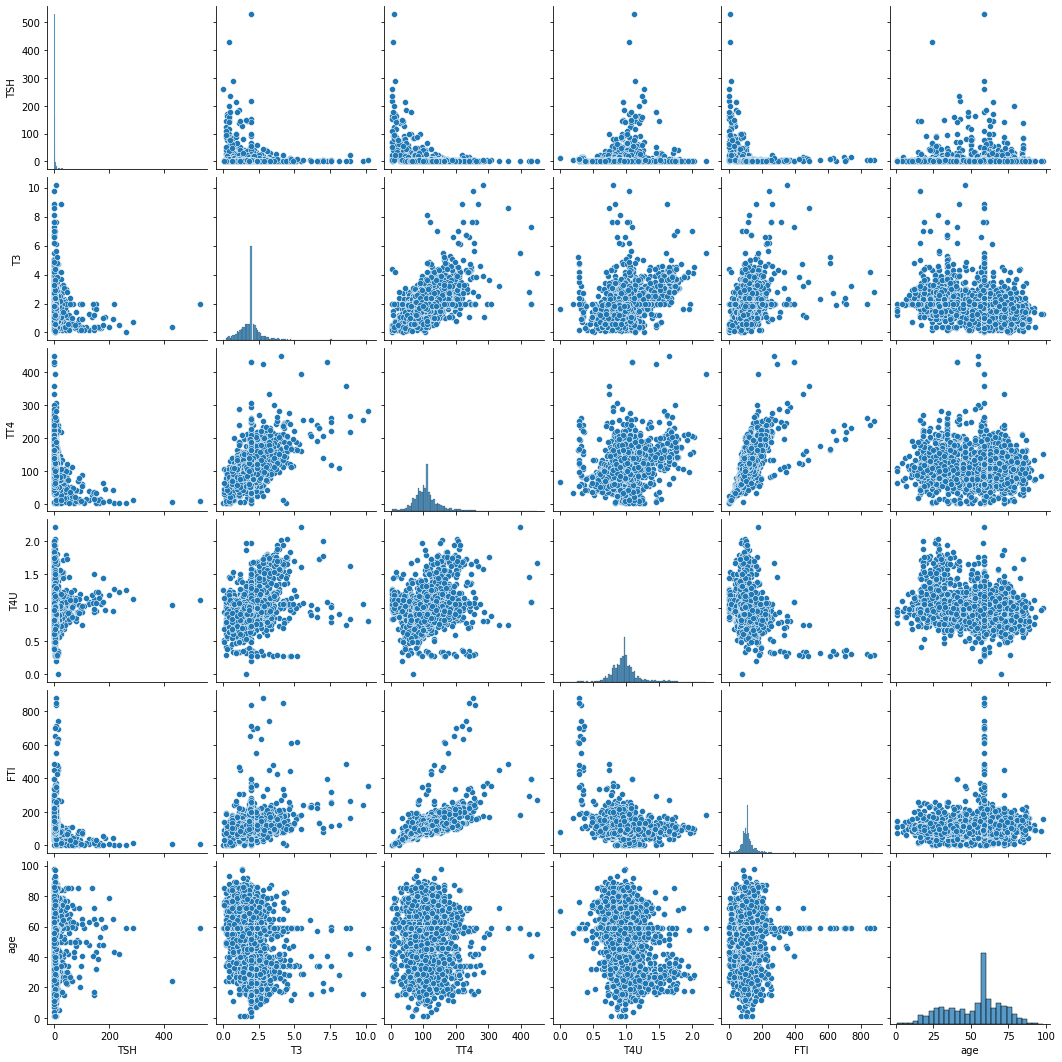

In [111]:
#a scatter plot showing how all numerical variables correlate with each other
plt.figure(figsize = (4,4))
sns.pairplot(df[['TSH', 'T3', 'TT4', 'T4U', 'FTI', 'age']])
plt.show()

# Modelling.

## Random Forest.

In [112]:
# Creating a dataframe for Random Forest Modelling
df_le = df
# Label encoding.
from sklearn.preprocessing import LabelEncoder
# instantiate labelencoder object
le = LabelEncoder()
# apply le on categorical feature columns
df_le[categorical] = df_le[categorical].apply(lambda col: le.fit_transform(col))
df_le[boolean] = df_le[boolean].apply(lambda col: le.fit_transform(col))
df_le.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,0,72.0,1,0,0,0,0,0,0,0,0,0,0,0,1,30.0,1,0.6,1,15.0,1,1.48,1,10.0
1,0,15.0,0,0,0,0,0,0,0,0,0,0,0,0,1,145.0,1,1.7,1,19.0,1,1.13,1,17.0


In [113]:
# Splitting the data
from sklearn.model_selection import train_test_split

y = df_le['status'].values
test_features =df_le.columns.to_list()
test_features.remove('status')
X = df_le[test_features].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [114]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
# Making predictions
y_pred = rf.predict(X_test)
# Comparing the Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,618.000000,618.000000
mean,0.959547,0.962783
std,0.197179,0.189446
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [115]:
# Measuring the accuracy of the model
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(f'Accuracy score =: {accuracy_score(y_test, y_pred)} ,f1 score = {f1_score(y_test, y_pred)}')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

Accuracy score =: 0.9902912621359223 ,f1 score = 0.9949494949494949
              precision    recall  f1-score   support

           0       0.91      0.84      0.87        25
           1       0.99      1.00      0.99       593

    accuracy                           0.99       618
   macro avg       0.95      0.92      0.93       618
weighted avg       0.99      0.99      0.99       618



array([[ 21,   4],
       [  2, 591]])

* The initial model for Random Forest had an accuracy of 98.87% and an F1 score of 0.99.

* The Confusion Matrix suggested 20 and 591 accurate predictions and, 2 and 5 inaccurate predictions.

In [116]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.009708737864077669
Mean Squared Error: 0.009708737864077669
Root Mean Squared Error: 0.0985329278164293


In [117]:
# Get feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances.
print('The Importance of the features is as follows in Descending order') 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

The Importance of the features is as follows in Descending order
Variable: FTI                  Importance: 0.3598
Variable: TSH                  Importance: 0.2393
Variable: TT4                  Importance: 0.2304
Variable: T3                   Importance: 0.0672
Variable: T4U                  Importance: 0.0483
Variable: age                  Importance: 0.0408
Variable: sex                  Importance: 0.0054
Variable: TSH_measured         Importance: 0.0045
Variable: T3_measured          Importance: 0.0037
Variable: TT4_measured         Importance: 0.0002
Variable: T4U_measured         Importance: 0.0002
Variable: FTI_measured         Importance: 0.0001
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
V

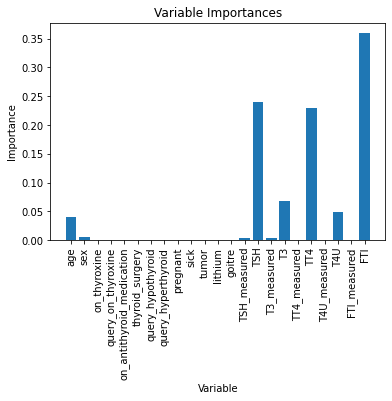

In [118]:
# Plotting the feature importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [119]:
# Selecting only important features

X = df_le[['FTI','TSH','TT4','T3','T4U','age','sex','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']]
y = np.where(df_le.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
rf = RandomForestClassifier(n_estimators=10, max_depth=10,random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



array([[618]])

* The improved Random Forest Model had an accuracy of 100% and an F1 score of 0.
0

* The confusion matrix suggested 618 accurate predictions.

In [120]:
# Comparing the Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,618.0,618.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [121]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Hyperparameter Tuning.

In [122]:
# Previewing the parameters.
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [123]:
# Creating a dictionary of parameters
params = {'n_estimators': [1,2,5,10,20,30],'max_depth': [1, 2, 3]}

# Setting the number of folds.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()
search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
search.fit(X, y)
# Checking for the best parameters
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 1, 'n_estimators': 1}


In [124]:
# Applying the best parameters to the model
# Selecting only important features

X = df_le[['FTI','TSH','TT4','T3','T4U','age','sex','TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured']]
y = np.where(df_le.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
rf = RandomForestClassifier(n_estimators=10, max_depth=1, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



array([[618]])

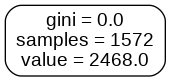

In [125]:
# picking the 1st tree from the forest
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

tree = rf.estimators_[3]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Ada Boost.

In [126]:
# Splitting the data
from sklearn.model_selection import train_test_split

y = df_le['status'].values
test_features =df_le.columns.to_list()
test_features.remove('status')
X = df_le[test_features].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [127]:
# Instantiating the model
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
#
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
#
acc_a = accuracy_score(y_test, y_pred)
f1_a = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_a} and the f1 score is {f1_a}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9951456310679612 and the f1 score is 0.9974726200505475


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       1.00      1.00      1.00       593

    accuracy                           1.00       618
   macro avg       0.98      0.96      0.97       618
weighted avg       1.00      1.00      1.00       618



array([[ 23,   2],
       [  1, 592]])

* The initial model for AdaBoost had an accuracy of 99.5% and an F1 score of 0.997.

* The Confusion Matrix suggested 23 and 592 accurate predictions and, 1 and 5 inaccurate predictions.

In [128]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0048543689320388345
Mean Squared Error: 0.0048543689320388345
Root Mean Squared Error: 0.06967330142916177


In [129]:
# Get feature importances
importances = list(ada.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances.
print('The Importance of the features is as follows in Descending order') 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

The Importance of the features is as follows in Descending order
Variable: age                  Importance: 0.24
Variable: TSH                  Importance: 0.24
Variable: FTI                  Importance: 0.2
Variable: T3                   Importance: 0.14
Variable: T4U                  Importance: 0.1
Variable: TT4                  Importance: 0.08
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Im

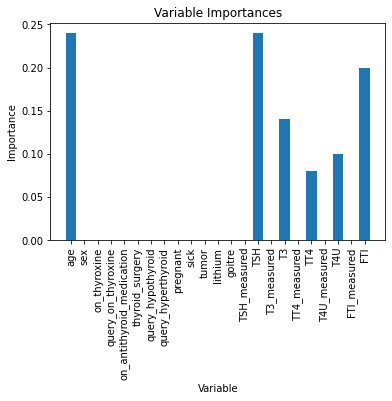

In [130]:
# Plotting the feature importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [131]:
# Selecting only important features

X = df_le[['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid']]
y = np.where(df_le.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



array([[618]])

* The improved AdaBoost Model had an accuracy of 100% and an F1 score of 0.
0

* The confusion matrix suggested 618 accurate predictions.

In [132]:
# Comparing the Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,618.0,618.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [133]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


### Hyperparameter Tuning.

In [134]:
# Previewing the parameters.
AdaBoostClassifier()

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [135]:
# Creating a dictionary of parameters
params = {'n_estimators': [1,2,5,10,20,30],'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]}

# Setting the number of folds.
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kfold = KFold(n_splits=10, shuffle=True)
model = AdaBoostClassifier()
search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
search.fit(X, y)
# Checking for the best parameters
print(f'The best parameters are: {search.best_params_}')


The best parameters are: {'learning_rate': 0.0001, 'n_estimators': 1}


In [136]:
# Applying the best parameters to the model
# Selecting only important features

X = df_le[['age','sex','on_thyroxine','query_on_thyroxine','on_antithyroid_medication','thyroid_surgery','query_hypothyroid']]
y = np.where(df_le.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
ada = AdaBoostClassifier(n_estimators=1, learning_rate= 0.0001, random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



array([[618]])

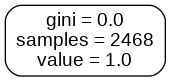

In [137]:
# picking the 1st tree from the forest
from io import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image 

tree = ada.estimators_[0]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Gradient Boost.

In [140]:
# Splitting the data
from sklearn.model_selection import train_test_split

y = df_le['status'].values
test_features =df_le.columns.to_list()
test_features.remove('status')
X = df_le[test_features].values
# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# Instantiating the model
from sklearn.ensemble import GradientBoostingClassifier

target_number_of_trees = 300
grb = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.01, max_depth=2)
grb.fit(X_train, y_train)

# Making predictions
y_pred = grb.predict(X_test)

# Measuring the accuracy of the model
#
acc_1 = accuracy_score(y_test, y_pred)
f1_1 = f1_score(y_test, y_pred)

print(f'The accuracy score is: {acc_1} and the f1 score is {f1_1}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9951456310679612 and the f1 score is 0.9974726200505475


              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       1.00      1.00      1.00       593

    accuracy                           1.00       618
   macro avg       0.98      0.96      0.97       618
weighted avg       1.00      1.00      1.00       618



array([[ 23,   2],
       [  1, 592]])

* The initial Gradient Boost Model had an accuracy of 99.5% and an F1 score of 0.997.

* The confusion matrix suggested 23 and 592 accurate predictions, 2 and 1 inaccurate predictions.

In [141]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0048543689320388345
Mean Squared Error: 0.0048543689320388345
Root Mean Squared Error: 0.06967330142916177


In [142]:
# Get feature importances
importances = list(grb.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(test_features, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances.
print('The Importance of the features is as follows in Descending order') 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

The Importance of the features is as follows in Descending order
Variable: FTI                  Importance: 0.7462
Variable: TSH                  Importance: 0.2412
Variable: age                  Importance: 0.0051
Variable: T3                   Importance: 0.0044
Variable: TT4                  Importance: 0.003
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroid   Importance: 0.0
Variable: pregnant             Importance: 0.0
Variable: sick                 Importance: 0.0
Variable: tumor                Importance: 0.0
Variable: lithium              Importance: 0.0
Variable: goitre               Importance: 0.0
Variable: TSH_measured         Importance: 0.0
Variable: T3_measured          Importance: 0.0
Variable: TT4_measured 

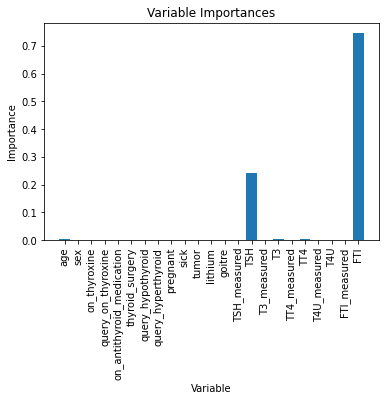

In [143]:
# Plotting the feature importance
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [144]:
# Selecting only important features

X = df_le[['FTI','TSH','age','T3','TT4',]]
y = np.where(df_le.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instantiating the model
ada = AdaBoostClassifier(random_state = 0)
ada.fit(X_train, y_train)

# Making predictions
y_pred = ada.predict(X_test)

# Measuring the accuracy of the model
print(f'The accuracy score is: {accuracy_score(y_test, y_pred)} and the f1 score is {f1_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')
confusion_matrix(y_test, y_pred)

The accuracy score is: 1.0 and the f1 score is 0.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       618

    accuracy                           1.00       618
   macro avg       1.00      1.00      1.00       618
weighted avg       1.00      1.00      1.00       618



array([[618]])

* The improved Gradient Boost Model had an accuracy of 100% and an F1 score of 0.
0

* The confusion matrix suggested 618 accurate predictions.

In [145]:
# Comparing the Actual and Predicted
comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
comparison_frame.describe()

,Actual,Predicted
count,618.0,618.0
mean,0.0,0.0
std,0.0,0.0
min,0.0,0.0
25%,0.0,0.0
50%,0.0,0.0
75%,0.0,0.0
max,0.0,0.0


In [146]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


# Support Vector Machine.

In [147]:
# Defing X and y.
# X is defined by two features which had the highest feature importance from the previous models.
X = df_le[['FTI','TSH']]
y = (df_le.status)# == 'hypothyroid', 1, 0)

# Splitting the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Standardising the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear.

In [148]:
# Fit the model
from sklearn.svm import SVC
linear_model = SVC(kernel= 'linear')
linear_model.fit(X_train,y_train)

# Predict the response for the test set
y_predl = linear_model.predict(X_test)

# Checking the accurancy of the model
print('Accuracy score =',accuracy_score(y_test,y_predl))
print('f1 score =',f1_score(y_test, y_predl))
print(confusion_matrix(y_test, y_predl))
print(classification_report(y_test, y_predl))

Accuracy score = 0.9838187702265372
f1 score = 0.9915966386554621
[[ 18   7]
 [  3 590]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.99      0.99      0.99       593

    accuracy                           0.98       618
   macro avg       0.92      0.86      0.89       618
weighted avg       0.98      0.98      0.98       618



In [149]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predl))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predl))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predl)))

Mean Absolute Error: 0.016181229773462782
Mean Squared Error: 0.016181229773462782
Root Mean Squared Error: 0.12720546282869608


* The Linear model had an accuracy of 98.54%, and an F1 score of 0.9924.
* The confusion matrix had 18 and 591 accurate predictions and, 2 and 7 inaccurate predictions.

## Polynomial.

In [150]:
# Fit the model 
polynomial_model = SVC(kernel='poly',degree=4,gamma='auto')
polynomial_model.fit(X_train, y_train)

# Predict the response for the test set
y_predp = polynomial_model.predict(X_test)

# Checking the accurancy of the model
print('Accuracy score =',accuracy_score(y_test,y_predp))
print('f1 score =',f1_score(y_test, y_predp))
print(confusion_matrix(y_test, y_predp))
print(classification_report(y_test, y_predl))

Accuracy score = 0.9854368932038835
f1 score = 0.9924559932942164
[[ 17   8]
 [  1 592]]
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.99      0.99      0.99       593

    accuracy                           0.98       618
   macro avg       0.92      0.86      0.89       618
weighted avg       0.98      0.98      0.98       618



In [151]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predp))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predp))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predp)))

Mean Absolute Error: 0.014563106796116505
Mean Squared Error: 0.014563106796116505
Root Mean Squared Error: 0.12067769800636945


* The Polynomial model had an accuracy of 97.89%, and an F1 score of 0.9891.
* The confusion matrix had 13 and 592 accurate predictions and, 1 and 12 inaccurate predictions.

## RBF.

In [152]:
# Fit the model
rbf_model = SVC(kernel= 'rbf')
rbf_model.fit(X_train,y_train.ravel())

# Predict the response for the test set
y_predr = rbf_model.predict(X_test)

# Checking the accurancy of the model
print('Accuracy score =',accuracy_score(y_test,y_predr))
print('f1 score =',f1_score(y_test, y_predr))
print(confusion_matrix(y_test, y_predr))
print(classification_report(y_test, y_predr))

Accuracy score = 0.9854368932038835
f1 score = 0.9924433249370277
[[ 18   7]
 [  2 591]]
              precision    recall  f1-score   support

           0       0.90      0.72      0.80        25
           1       0.99      1.00      0.99       593

    accuracy                           0.99       618
   macro avg       0.94      0.86      0.90       618
weighted avg       0.98      0.99      0.98       618



In [153]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predr))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predr))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predr)))

Mean Absolute Error: 0.014563106796116505
Mean Squared Error: 0.014563106796116505
Root Mean Squared Error: 0.12067769800636945


* The RBF model had an accuracy of 98.38%, and an F1 score of 0.9916.
* The confusion matrix had 18 and 590 accurate predictions and, 3 and 7 inaccurate predictions.

## Sigmoid.

In [154]:
# Fit the model
sigmoid_model = SVC(kernel='sigmoid', gamma='auto')
sigmoid_model.fit(X_train, y_train)

# Predict the response for the test set
y_preds = sigmoid_model.predict(X_test)

# Checking the accurancy of the model
print('Accuracy score =',accuracy_score(y_test,y_preds))
print('f1 score =',f1_score(y_test, y_preds))
print(confusion_matrix(y_test, y_preds))
print(classification_report(y_test, y_preds))

Accuracy score = 0.9336569579288025
f1 score = 0.9653423499577345
[[  6  19]
 [ 22 571]]
              precision    recall  f1-score   support

           0       0.21      0.24      0.23        25
           1       0.97      0.96      0.97       593

    accuracy                           0.93       618
   macro avg       0.59      0.60      0.60       618
weighted avg       0.94      0.93      0.94       618



In [155]:
# Assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_preds))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_preds))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_preds)))

Mean Absolute Error: 0.06634304207119741
Mean Squared Error: 0.06634304207119741
Root Mean Squared Error: 0.2575714310073953


* The Sigmoid model had an accuracy of 98.38%, and an F1 score of 0.9916.
* The confusion matrix had 18 and 590 accurate predictions and, 3 and 7 inaccurate predictions.

In [156]:
# Importing the SVC library.
from sklearn.svm import SVC,LinearSVC

## Results.

In [157]:
print('Accuracy of Linear Model =',accuracy_score(y_test,y_predl))
print('Accuracy of Polynomial Model =',accuracy_score(y_test,y_predp))
print('Accuracy of RBF =',accuracy_score(y_test,y_predr))
print('Accuracy of Sigmoid Model =',accuracy_score(y_test,y_preds))

Accuracy of Linear Model = 0.9838187702265372
Accuracy of Polynomial Model = 0.9854368932038835
Accuracy of RBF = 0.9854368932038835
Accuracy of Sigmoid Model = 0.9336569579288025


In [158]:
print('F1 score of Linear Model =',f1_score(y_test, y_predl))
print('F1 score of Polynomial Model =',f1_score(y_test, y_predp))
print('F1 score of RBF Model =',f1_score(y_test, y_predr))
print('F1 score of Sigmoid Model =',f1_score(y_test, y_preds))

F1 score of Linear Model = 0.9915966386554621
F1 score of Polynomial Model = 0.9924559932942164
F1 score of RBF Model = 0.9924433249370277
F1 score of Sigmoid Model = 0.9653423499577345


* From the accuracies of the models tested, the Linear Model was found to have the highest accuracy  of 98.54% and an F1 score of 0.9916 compared to Polynomial, RBF and Sigmoid.



## Hyperparameter Tuning.

In [159]:
# Previewing parameters of the SVC model that can be tuned
SVC()

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [163]:
# Creating a dictionary of parameters to tune
params = {'C': np.arange(1, 102, 10),'gamma': np.linspace(2**-5, 2**5, 10)}

# Setting the number of folds
from sklearn.model_selection import RandomizedSearchCV

kfold = KFold(n_splits=3, shuffle=True)
model = SVC(kernel = 'linear')
search = RandomizedSearchCV(model, param_distributions=params, scoring = 'f1', cv = kfold, random_state = 0)

# Selecting the variables
X = df_le[['FTI', 'TSH']]
y = (df_le.status)

# Fitting the grid search
search.fit(X, y)

# Checking for the best parameters
print('The best parameters are:', search.best_params_)


The best parameters are: {'gamma': 0.03125, 'C': 11}


## Remodelling with Optimal Parameters.

In [164]:
# Selecting only important features and the y variable

X = df_le.drop('status', axis = 1)
y = (df_le.status)# == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Standardising features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Instantiating the model with optimal features
#
svc = SVC(C = 11, gamma = 0.03125, kernel='rbf')
svc.fit(X_train, y_train)

# Making predictions
#
y_pred = svc.predict(X_test)

# Measuring the accuracy of the model
#
print('Accuracy score =',accuracy_score(y_test, y_pred))
print('f1 score =', f1_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy score = 0.9838187702265372
f1 score = 0.9915966386554621
              precision    recall  f1-score   support

           0       0.86      0.72      0.78        25
           1       0.99      0.99      0.99       593

    accuracy                           0.98       618
   macro avg       0.92      0.86      0.89       618
weighted avg       0.98      0.98      0.98       618



array([[ 18,   7],
       [  3, 590]])

## Cross-Validation.

In [165]:
# Performing cross validation of ten folds

from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, scoring = 'f1', cv = 10)

# Calculating the mean of the cross validation scores
print('Mean of cross validation scores =',scores.mean())
# Calculating the variance of the cross validation scores from the mean
print('Standard deviation of the cross validation scores=',scores.std())

Mean of cross validation scores = 0.977572701487663
Standard deviation of the cross validation scores= 0.0015065702066391917


# Conclusion.

* From the prediction models used, AdaBoost was found to have the highest accuracy of 99.5% before hyperparameter tuning and an accuracy of 100% after remodelling with the features that had the highest importance.

* It is recommended to use the AdaBoost as the prediction model for hypothyroidism.